# Unsupervised Learning Techniques:


# A. Clustering Algoritms: k-means and DBSCAN:

* Clustering is the task of identifying similar instances and assigning them to clusters, or groups of similar instances.

* Clustering is used in a wide variety of applications, including:
    * Customer segmentation
    * Data analysis
    * Dimensionality reduction
    * Feature engineering
    * Anomaly detection (also called outlier detection)
    * Semi-supervised learning
    * Search engines
    * Image segmentation
    

### A.1 k-means:

* In the context of clustering, an instance’s label is the index of the cluster to which the algorithm assigns this instance; this is not to be confused with the class labels in classification, which are used as targets.

* k-means assigns an instance to a cluster depending on the distance of the instance to the centroid.
    * Instead of assigning each instance to a single cluster, which is called *hard clustering*, it can be useful to give each instance a score per cluster, which is called *soft clustering*. The score can be the distance between the instance and the centroid or a similarity score (or affinity), such as the Gaussian radial basis function.
    
* `KMeans` class:
    * `KMeans` instance preserves the predicted labels of the instances it was trained on, available via the `labels_` instance variable.
    * The `transform()` method measures the distance from each instance to every centroid.
        * If you have a highdimensional dataset and you transform it this way, you end up with a k-dimensional dataset: this transformation can be a very efficient nonlinear dimensionality reduction technique. Alternatively, you can use these distances as extra features to train another model.
    * The `KMeans` class uses an optimized initialization technique by default.

##### k-means algorithm:

* Start by placing the centroids randomly (e.g., by picking k instances at random from the dataset and using their locations as centroids).
* Then label the instances, update the centroids, label the instances, update the centroids, and so on until the centroids stop moving.
* The algorithm is guaranteed to converge in a finite number of steps (usually quite small). That’s because the mean squared distance between the instances and their closest centroids can only go down at each step, and since it cannot be negative, it’s guaranteed to converge.
    * Although the algorithm is guaranteed to converge, it may not converge to the right solution (i.e., it may converge to a local optimum): whether it does or not depends on the **centroid initialization**.
    
* When the data has a clustering structure, the computational complexity of the algorithm is generally linear with regard to the number of instances $m$, the number of clusters $k$, and the number of dimensions $n$. If the data has no clustering structure, the complexity can increase exponentially w/ the number of instances.
 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Create sample data
blob_centers = np.array([[ 0.2,  2.3], [-1.5 ,  2.3], [-2.8,  1.8],
                         [-2.8,  2.8], [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])
X, y = make_blobs(n_samples=2000, centers=blob_centers, cluster_std=blob_std,
                  random_state=7)

k = 5
kmeans = KMeans(n_init=15, n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X)

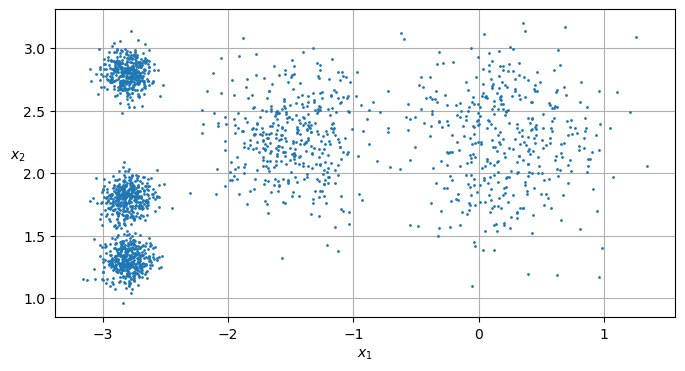

In [2]:
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$", rotation=0)

plt.figure(figsize=(8, 4))
plot_clusters(X)
plt.gca().set_axisbelow(True)
plt.grid();

In [3]:
y_pred

array([0, 4, 1, ..., 3, 1, 4])

In [4]:
y_pred is kmeans.labels_

True

In [5]:
kmeans.labels_

array([0, 4, 1, ..., 3, 1, 4])

In [6]:
# Centroids found by the algorithm
kmeans.cluster_centers_

array([[-2.80037642,  1.30082566],
       [ 0.20876306,  2.25551336],
       [-1.46679593,  2.28585348],
       [-2.79290307,  2.79641063],
       [-2.80389616,  1.80117999]])

In [7]:
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans.predict(X_new)

array([1, 1, 3, 3])

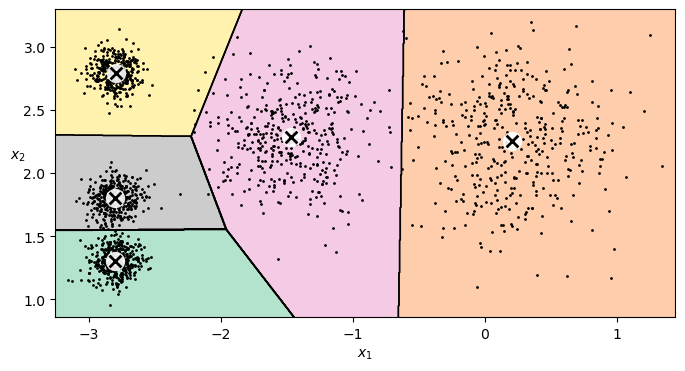

In [8]:
# k-means decision boundaries (Voronoi tessellation)
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$")
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", rotation=0)
    else:
        plt.tick_params(labelleft=False)

plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X);

In [9]:
kmeans.transform(X_new).round(2)

array([[2.89, 0.33, 1.49, 2.9 , 2.81],
       [5.84, 2.8 , 4.48, 5.85, 5.81],
       [1.71, 3.29, 1.69, 0.29, 1.21],
       [1.22, 3.22, 1.55, 0.36, 0.73]])

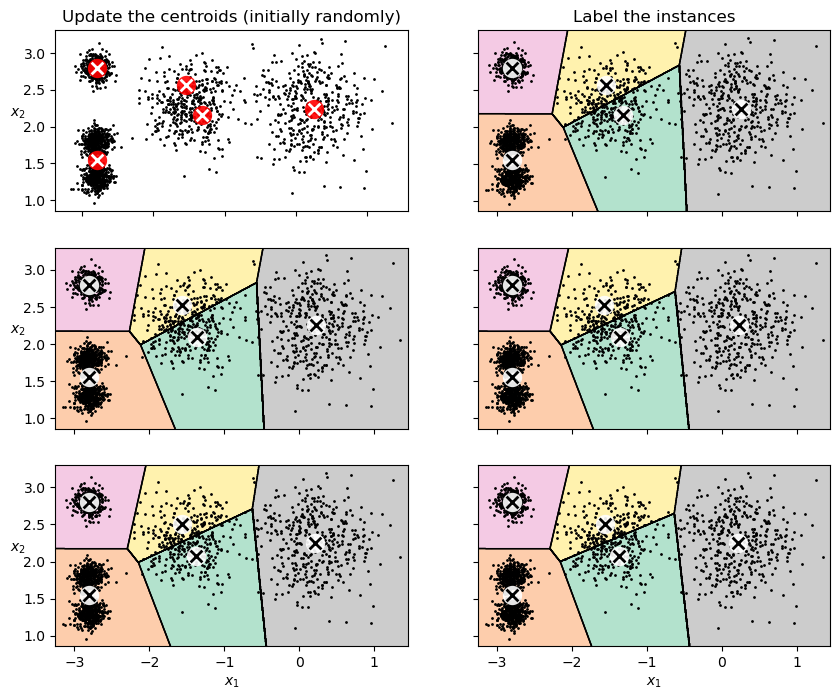

In [11]:
kmeans_iter1 = KMeans(n_clusters=5, init="random", n_init=1, max_iter=1,
                      random_state=5)
kmeans_iter2 = KMeans(n_clusters=5, init="random", n_init=1, max_iter=2,
                      random_state=5)
kmeans_iter3 = KMeans(n_clusters=5, init="random", n_init=1, max_iter=3,
                      random_state=5)
kmeans_iter1.fit(X)
kmeans_iter2.fit(X)
kmeans_iter3.fit(X)

plt.figure(figsize=(10, 8))

plt.subplot(321)
plot_data(X)
plot_centroids(kmeans_iter1.cluster_centers_, circle_color='r', cross_color='w')
plt.ylabel("$x_2$", rotation=0)
plt.tick_params(labelbottom=False)
plt.title("Update the centroids (initially randomly)")

plt.subplot(322)
plot_decision_boundaries(kmeans_iter1, X, show_xlabels=False,
                         show_ylabels=False)
plt.title("Label the instances")

plt.subplot(323)
plot_decision_boundaries(kmeans_iter1, X, show_centroids=False,
                         show_xlabels=False)
plot_centroids(kmeans_iter2.cluster_centers_)

plt.subplot(324)
plot_decision_boundaries(kmeans_iter2, X, show_xlabels=False,
                         show_ylabels=False)

plt.subplot(325)
plot_decision_boundaries(kmeans_iter2, X, show_centroids=False)
plot_centroids(kmeans_iter3.cluster_centers_)

plt.subplot(326)
plot_decision_boundaries(kmeans_iter3, X, show_ylabels=False)

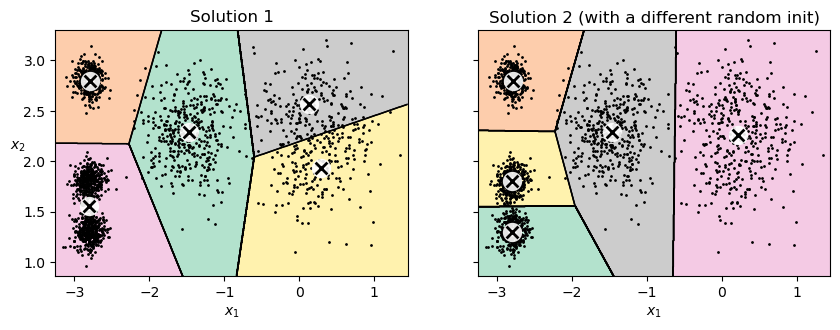

In [12]:
# Running K-Means w/ different random seed
def plot_clusterer_comparison(clusterer1, clusterer2, X, title1=None,
                              title2=None):
    clusterer1.fit(X)
    clusterer2.fit(X)

    plt.figure(figsize=(10, 3.2))

    plt.subplot(121)
    plot_decision_boundaries(clusterer1, X)
    if title1:
        plt.title(title1)

    plt.subplot(122)
    plot_decision_boundaries(clusterer2, X, show_ylabels=False)
    if title2:
        plt.title(title2)

kmeans_rnd_init1 = KMeans(n_clusters=5, init="random", n_init=1, random_state=2)
kmeans_rnd_init2 = KMeans(n_clusters=5, init="random", n_init=1, random_state=9)

plot_clusterer_comparison(kmeans_rnd_init1, kmeans_rnd_init2, X,
                          "Solution 1",
                          "Solution 2 (with a different random init)")


##### Centroid Initialization Methods:

* If you happen to know approximately where the centroids should be (e.g., if you ran another clustering algorithm earlier), then you can set the `init` hyperparameter to a NumPy array containing the list of centroids, and set `n_init` to 1.
* Another solution is to run the algorithm multiple times with different random initializations and keep the best solution:
    * The number of random initializations is controlled by the `n_init` hyperparameter: by default it is equal to 10, which means that the whole algorithm described earlier runs 10 times when you call `fit()`, and  Scikit-Learn keeps the best solution.
    * To know the best solution, `KMeans` uses a performance metric called the model's inertia. This inertia is the sum of the squared distances between the instances and their closes centroids. `KMeans` class runs the algorithm `n_init` times and keeps the model w/ the lowest inertia. The models inertial is accessible via the `inertia_` instance variable.
    * The `score()` method returns the negative inertia(a predictor's `score()` method must always respect Scikit-Learn's "greater is better" rule: If a predictor is better than another, its `score()` method should return a greater score).

* **k-means++**:
    * `KMeans` class uses this initialization method by default. (`init="k-means++"`)
    * k-means++ is a smarter initialization step that tends to select centroids that are distant from one another, and this improvement makes the k-means algorithm much less likely to converge to a suboptimal solution.
    * It makes it possible to drastically reduce the number of times the algorithm needs to be run to find the optimal solution.
    * k-means++ initialization algorithm:
        1. Take one centroid, $c^{(i)}$, chosen uniformly at random from the dataset.
        2. Take a new centroid, $c^{(i)}$, choosing an instance, $x^{(i)}$, with probability $\Large \frac{D(x^{(i)})^2}{\sum_{j=1}^mD(x^{(j)})^2}$ :
            * $D(x^{(i)})$ is the distance between the instance $x^{(i)}$ and the closest centroid that was already chosen.
            * This probability distribution ensures that the instances farther away from already chosen centroids are much more likely be selected as centroids.
        3. Repeat the previous step until all $k$ centroids have been chosen.

In [13]:
# fitting known centroids
good_init = np.array([[-3, 3], [-3, 2], [-3, 1], [-1, 2], [0, 2]])
kmeans = KMeans(n_clusters=5, init=good_init, n_init=1, random_state=42)
kmeans.fit(X)

KMeans(init=array([[-3,  3],
       [-3,  2],
       [-3,  1],
       [-1,  2],
       [ 0,  2]]),
       n_clusters=5, n_init=1, random_state=42)

In [14]:
kmeans.cluster_centers_

array([[-2.79290307,  2.79641063],
       [-2.80389616,  1.80117999],
       [-2.80037642,  1.30082566],
       [-1.46679593,  2.28585348],
       [ 0.20876306,  2.25551336]])

In [15]:
kmeans.inertia_

211.59853725816834

In [16]:
kmeans.score(X)

-211.59853725816836

##### Accelerated k-means and mini-batch k-means:

* Accelerated k-means:
    * On some large datasets w/ many clusters, the algorithm can be accelerated by avoiding many unnecessary distance calculations. Charles Elkan achieved this by exploiting the triangle inequality (i.e., that a straight line is always the shortest distance between 2 points) and by keeping track of lower and upper bounds for distances between instances and centroids.
    * `KMeans(algorithm="elkan")`
    * Does not always accelerate traing, it depends on the dataset.

* Mini-batch k-means:
    * Instead of using the full dataset at each iteration, the algorithm is capable of using mini-batches, moving the centroids just slightly at each iteration. 
    * This speeds up the algorithm (typically by a factor of three to four) and makes it possible to cluster huge datasets that do not fit in memory.
    * Scikit-Learn implements this algorithm in the `MiniBatchKMeans` class.
    * If the dataset does not fit in memory, the simplest option is to use the `memmap` class. Alternatively, you can pass one mini-batch at a time to `partial_fit()` method, but this will require much more work, since you will need to perform multiple initializations and select the best one yourself.

In [18]:
from sklearn.cluster import MiniBatchKMeans

minibatch_kmeans = MiniBatchKMeans(n_clusters=5, random_state=42, n_init='auto')
minibatch_kmeans.fit(X)

c:\Users\JCA\anaconda3\envs\ds_ml_dl\lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


MiniBatchKMeans(n_clusters=5, n_init='auto', random_state=42)

In [19]:
minibatch_kmeans.inertia_

211.65945105712612

In [20]:
# Using Minibatches along with memmap